# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [1]:
import sqlite3

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# TODO: Set up a connection the "Market.db" database
connection = sqlite3.connect("db/Market.db")

# TODO: Set up the cursor
cursor = connection.cursor()

### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [5]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT COUNT(*)
    FROM products
    WHERE price < 10
""")

rows = cursor.fetchall()

print(rows)

[(11,)]


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [7]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT country, COUNT(*)
    FROM suppliers
    GROUP BY country
    ORDER BY COUNT(*) DESC
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('USA', 4), ('Germany', 3), ('France', 3), ('UK', 2), ('Sweden', 2), ('Japan', 2), ('Italy', 2), ('Canada', 2), ('Australia', 2), ('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1), ('Finland', 1), ('Denmark', 1), ('Brazil', 1)]


<BarContainer object of 16 artists>

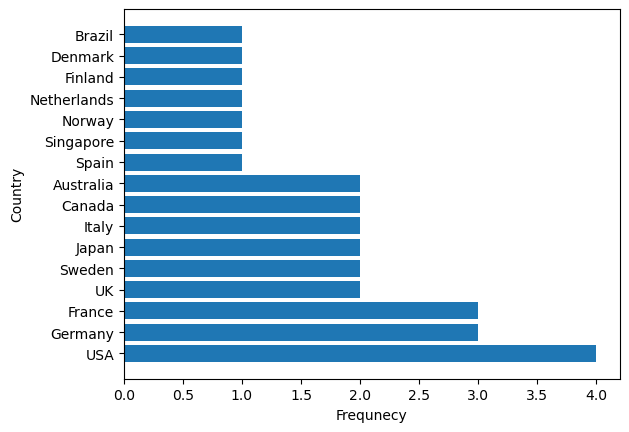

In [20]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['country','count'])

# TODO: Generate a visualization on this dataframe
plt.xlabel('Frequnecy')
plt.ylabel('Country')
plt.barh(df["country"],df["count"])

### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [25]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT country, COUNT(*)
    FROM customers
    GROUP BY country
    ORDER BY COUNT(*) DESC            
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()

<BarContainer object of 21 artists>

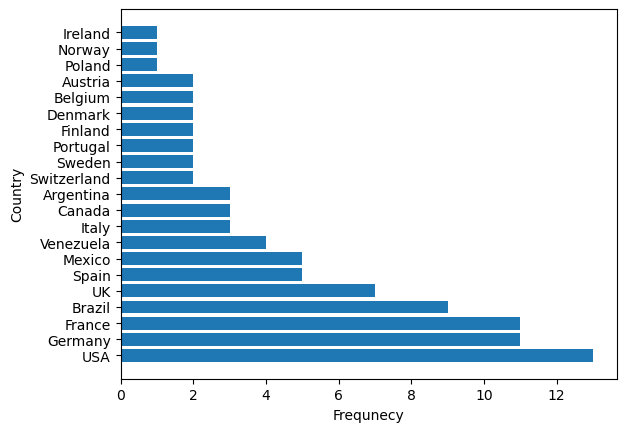

In [27]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['country','count'])

# TODO: Generate a visualization on this dataframe
plt.xlabel('Frequnecy')
plt.ylabel('Country')
plt.barh(df["country"],df["count"])

### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [34]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT p.ProductName, SUM(O.Quantity)
FROM Products p
LEFT JOIN OrderDetails o
ON p.ProductID = o.ProductID
GROUP BY p.ProductName
ORDER BY SUM(O.Quantity) ASC
LIMIT 20
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
rows

[('Laughing Lumberjack Lager', 5),
 ('Røgede sild', 15),
 ("Gustaf's Knäckebröd", 18),
 ('Mishi Kobe Niku', 20),
 ('Genen Shouyu', 25),
 ("Uncle Bob's Organic Dried Pears", 25),
 ('Queso Manchego La Pastora', 27),
 ("Grandma's Boysenberry Spread", 36),
 ('Gravad lax', 39),
 ('Röd Kaviar', 45),
 ('Filo Mix', 48),
 ('Mascarpone Fabioli', 52),
 ('Chocolade', 70),
 ('Valkoinen suklaa', 70),
 ('NuNuCa Nuß-Nougat-Creme', 71),
 ('Singaporean Hokkien Fried Mee', 77),
 ('Aniseed Syrup', 80),
 ('Ikura', 85),
 ('Louisiana Hot Spiced Okra', 90),
 ('Schoggi Schokolade', 90)]

<BarContainer object of 20 artists>

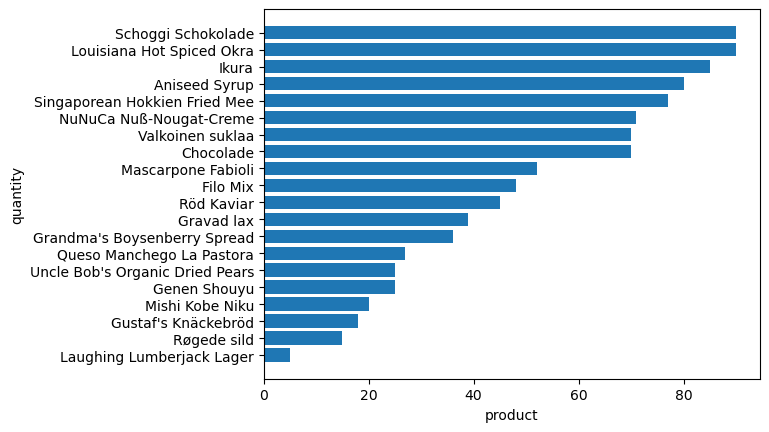

In [35]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows,columns=['product','quantity'])

# TODO: Generate a visualization on this dataframe
plt.xlabel('product')
plt.ylabel('quantity')
plt.barh(df["product"],df["quantity"])

### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [38]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT p.ProductName, SUM(O.Quantity)*p.Price AS total_revenue
    FROM Products p
    LEFT JOIN OrderDetails o
    ON p.ProductID = o.ProductID
    GROUP BY p.ProductName
    ORDER BY SUM(O.Quantity)*p.Price ASC
    LIMIT 20
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()

<BarContainer object of 20 artists>

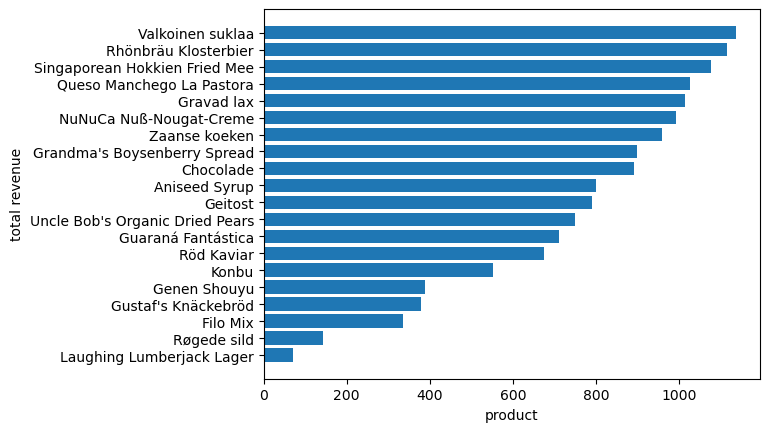

In [39]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['product','total_revenue'])

# TODO: Generate a visualization on this dataframe
plt.xlabel('product')
plt.ylabel('total revenue')
plt.barh(df["product"],df["total_revenue"])

### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT c.Country, COUNT(o.OrderID)
    FROM Customers c
    LEFT JOIN Orders o
    ON c.CustomerID = o.CustomerID
    GROUP BY c.Country
    ORDER BY COUNT(o.OrderID) DESC
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()

[('USA', 29),
 ('Germany', 25),
 ('Brazil', 19),
 ('France', 18),
 ('Austria', 13),
 ('UK', 12),
 ('Venezuela', 9),
 ('Mexico', 9),
 ('Canada', 9),
 ('Finland', 8),
 ('Sweden', 7),
 ('Spain', 7),
 ('Italy', 7),
 ('Ireland', 6),
 ('Portugal', 5),
 ('Switzerland', 4),
 ('Denmark', 4),
 ('Belgium', 2),
 ('Poland', 1),
 ('Norway', 1),
 ('Argentina', 1)]

<BarContainer object of 21 artists>

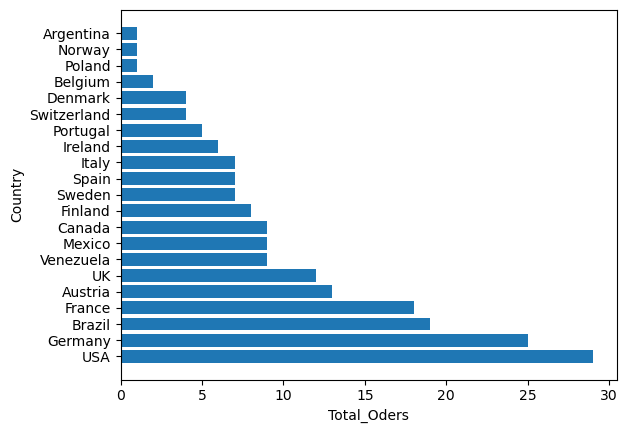

In [5]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows,columns=['Country','Total_Oders'])

# TODO: Generate a visualization on this dataframe
plt.xlabel('Total_Oders')
plt.ylabel('Country')
plt.barh(df["Country"],df["Total_Oders"])

### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [6]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT c.Country, COUNT(DISTINCT c.CustomerID)
    FROM Customers c
    LEFT JOIN Orders o
    ON c.CustomerID = o.CustomerID
    WHERE o.OrderID IS NULL
    GROUP BY c.Country
    ORDER BY COUNT(DISTINCT c.CustomerID) DESC
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()

<BarContainer object of 8 artists>

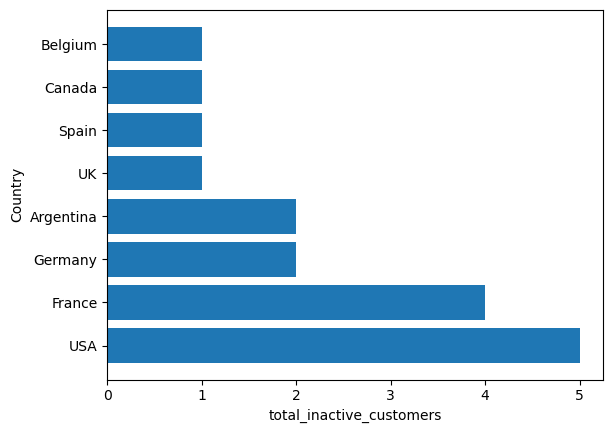

In [7]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows,columns=['Country','total_inactive_customers'])

# TODO: Generate a visualization on this dataframe
plt.xlabel('total_inactive_customers')
plt.ylabel('Country')
plt.barh(df["Country"],df["total_inactive_customers"])

### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [8]:
cursor.execute("""
    SELECT s.SupplierName, COUNT(DISTINCT o.OrderID)
    FROM Suppliers s
    LEFT JOIN Products p
    ON s.SupplierID = p.SupplierID
    LEFT JOIN OrderDetails o
    ON p.ProductID = o.ProductID
    GROUP BY s.SupplierID
    ORDER BY COUNT(DISTINCT o.OrderID) DESC
    LIMIT 10           
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
rows

[('Pavlova, Ltd.', 37),
 ('Plutzer Lebensmittelgroßmärkte AG', 37),
 ('Specialty Biscuits, Ltd.', 33),
 ('Norske Meierier', 30),
 ('Formaggi Fortini s.r.l.', 27),
 ('Gai pâturage', 26),
 ('Exotic Liquid', 21),
 ('New Orleans Cajun Delights', 20),
 ('Pasta Buttini s.r.l.', 20),
 ('Karkki Oy', 19)]

In [9]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT s.SupplierName, COUNT(o.OrderID)
    FROM Suppliers s
    LEFT JOIN Products p
    ON s.SupplierID = p.SupplierID
    LEFT JOIN OrderDetails o
    ON p.ProductID = o.ProductID
    GROUP BY s.SupplierID
    ORDER BY COUNT(o.OrderID) DESC
    LIMIT 10           
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
rows

[('Plutzer Lebensmittelgroßmärkte AG', 42),
 ('Pavlova, Ltd.', 40),
 ('Specialty Biscuits, Ltd.', 33),
 ('Norske Meierier', 32),
 ('Formaggi Fortini s.r.l.', 31),
 ('Gai pâturage', 26),
 ('Exotic Liquid', 21),
 ('New Orleans Cajun Delights', 20),
 ('Pasta Buttini s.r.l.', 20),
 ('Karkki Oy', 19)]

<BarContainer object of 10 artists>

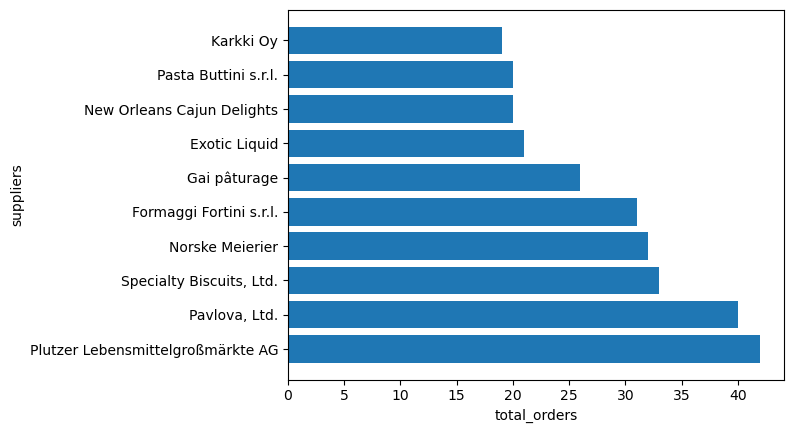

In [10]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows,columns=['suppliers','total_orders'])

# TODO: Generate a visualization on this dataframe
plt.xlabel('total_orders')
plt.ylabel('suppliers')
plt.barh(df["suppliers"],df["total_orders"])

## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

[Answer Here]

### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

[Answer Here]

### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

[Answer Here]

### Question 4

Which supplier has the most orders? Which evidence supports your answer?

'Plutzer Lebensmittelgroßmärkte AG' is the supplier with the highest number of orders, 42. This result comes from joining the Suppliers, Products, and OrderDetails tables, then grouping the rows by SupplierID and counting the number of OrderIDs. Moreover, as shown in the horizontal bar graph for most popular supplier, 'Plutzer Lebensmittelgroßmärkte AG' has the longest bar, indicating it has the highest number of total orders among all suppliers. However, if count only the distinct OrderIDs, both 'Plutzer Lebensmittelgroßmärkte AG' and 'Pavlova, Ltd.' happens to be equally popular suppliers, each with 37 unique orders